In [1]:
%matplotlib inline
import openpathsampling as paths
import numpy as np
import matplotlib.pyplot as plt
import os
import openpathsampling.visualize as ops_vis
from IPython.display import SVG

# Analyzing the flexible path length simulation

In [2]:
filename = "alanine_dipeptide_tps.nc"
#filename = "saved_AD_tps.nc"

In [3]:
flexible = paths.AnalysisStorage(filename)
engine = flexible.engines[0]
flex_scheme = flexible.schemes[0]

In [4]:
print "File size: {0} for {1} steps, {2} snapshots".format(
    flexible.file_size_str,
    len(flexible.steps),
    len(flexible.snapshots)
)

File size: 17.25GB for 10001 steps, 922214 snapshots


In [5]:
flex_scheme.move_summary(flexible)

shooting ran 100.000% (expected 100.00%) of the cycles with acceptance 5649/10000 (56.49%)


In [6]:
history = ops_vis.ReplicaHistoryTree(
    storage=flexible,
    steps=flexible.steps[0:50],
    replica=0
)

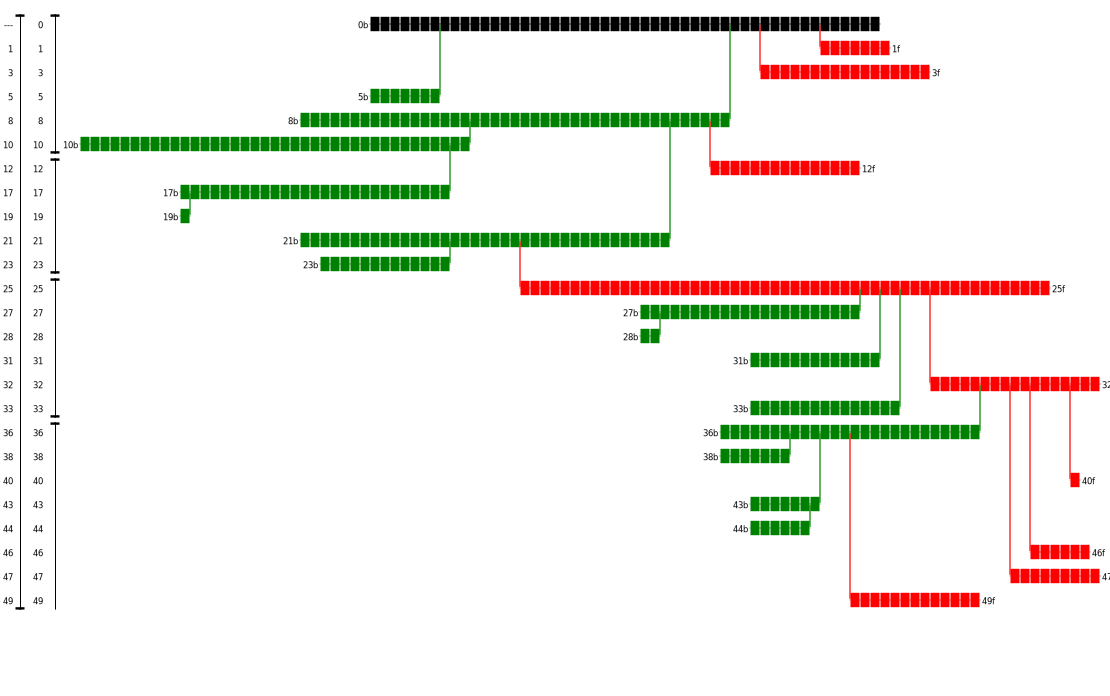

In [7]:
history.view.zoom = 1.0
history.view.scale_y = 24
history.view.scale_x = 10
history.view.font_size = 0.35
history.view.horizontal_gap = 0.05

SVG(history.view.to_svg())

In [8]:
full_history = ops_vis.ReplicaHistoryTree(
    storage=flexible,
    steps=flexible.steps[0:len(flexible.steps)],
    replica=0
)
print "Decorrelated trajectories:", len(full_history.decorrelated_trajectories)

Decorrelated trajectories: 915


Maximum: 392 (7.84 ps)
Average: 78.22 (1.564 ps)


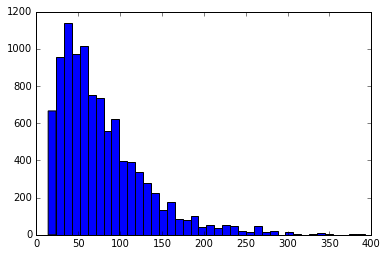

In [9]:
path_lengths = [len(step.active[0].trajectory) for step in flexible.steps]
plt.hist(path_lengths, bins=40);
print "Maximum:", max(path_lengths), "("+str(max(path_lengths)*engine.snapshot_timestep)+")"
print "Average:", "{0:.2f}".format(np.mean(path_lengths)), "("+(np.mean(path_lengths)*engine.snapshot_timestep).format("%.3f")+")"

In [18]:
# TODO: path density plots (arbitrary dimension!)

In [26]:
#import nglview as nv
#nv.show_mdtraj(traj.md())

In [12]:
# kinetic/potential energy for every snapshot saved

In [13]:
# kinetic/potential energy for the first frame in every accepted trajectory

In [14]:
# kinetic/potential energy at every shooting point

In [15]:
# TODO: "transition state analysis"
# my thought: 
# * pick 100 (decorrelated) trajectories
# * take every 3rd frame (or something like that)
# * run 50 (or 100?) committor shots with randomized initial velocities
# * say something about which points are likely at/near the 50% isocommittor

# Analyzing the fixed path length simulation

In [3]:
fixed = paths.AnalysisStorage("alanine_dipeptide_fixed_tps.nc")

In [7]:
engine = fixed.engines[0]
fixed_scheme = fixed.schemes[0]

print "File size: {0} for {1} steps, {2} snapshots".format(
    fixed.file_size_str,
    len(fixed.steps),
    len(fixed.snapshots)
)

File size: 7.50GB for 1001 steps, 401394 snapshots


In [8]:
fixed_scheme.move_summary(fixed)

shooting ran 100.000% (expected 100.00%) of the cycles with acceptance 477/1000 (47.70%)


In [9]:
history = ops_vis.ReplicaHistoryTree(
    storage=fixed,
    steps=fixed.steps[0:50],
    replica=0
)

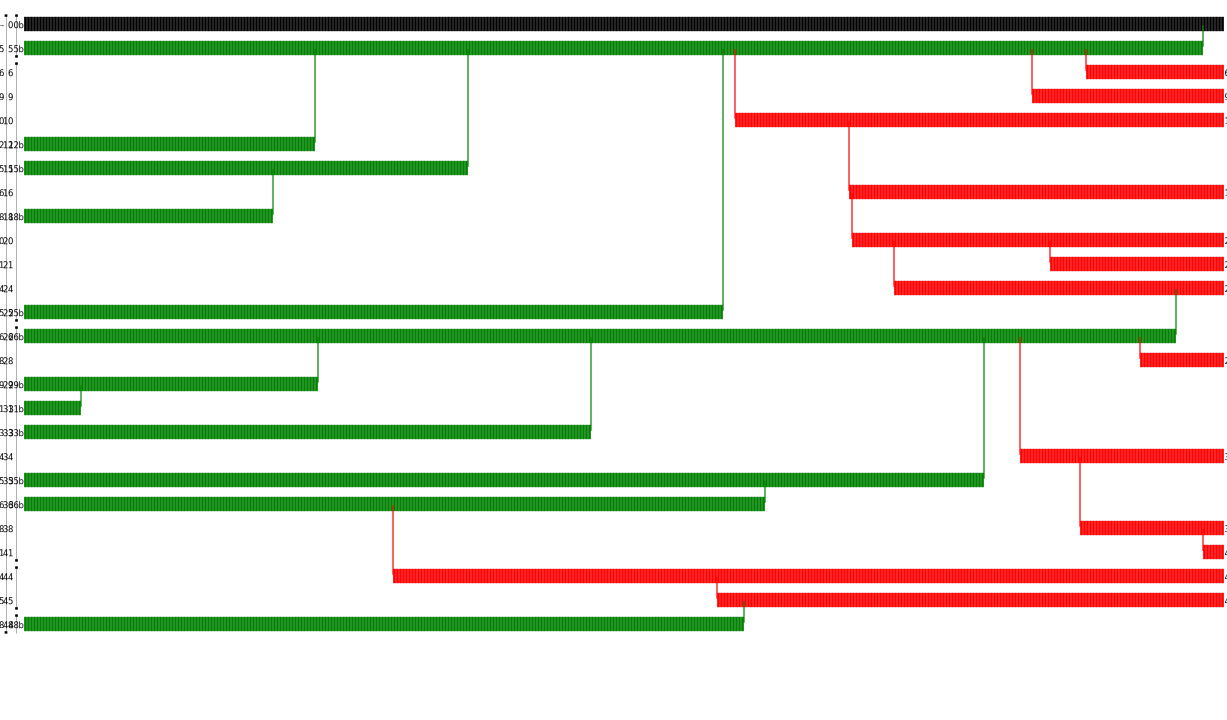

In [20]:
history.view.zoom = 1.0
history.view.scale_y = 24
history.view.scale_x = 3
history.view.font_size = 0.35
history.view.horizontal_gap = 0.05

SVG(history.view.to_svg())

In [19]:
full_history = ops_vis.ReplicaHistoryTree(
    storage=fixed,
    steps=fixed.steps[0:len(fixed.steps)],
    replica=0
)
print "Decorrelated trajectories:", len(full_history.decorrelated_trajectories)

Decorrelated trajectories: 37


In [ ]:
# checking for recrossings

In [ ]:
# checking the length of the crossing paths

# Comparing the fixed and flexible simulations

In [17]:
# transition path length distribution